<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-1/Notebooks/aula1_3_Matheus_Maia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matheus Maia Ávila

Aluno do bootcamp de Data Science aplicada da Alura

# Apresentação

Este notebook é um caderno das aulas do bootcamp de datascience aplicada da Alura, trabalhando dados reais disponibilizados pelo Data SUS. Este notebook pertence à **3ª aula do módulo 1**.

# O que foi feito na aula 2

## Obtendo os dados

Agora, vamos trabalhar outros dados do data SUS. Dessa vez, os dados são referente a gastos registrados no atendimento do paciente. Ou seja, quando a pessoa utilizou o serviço do SUS, registrou-se aquela quantia dos gastos. Novamente, os dados serão retirados do repositório no github. 

In [ ]:
# importando pandas

import pandas as pd

# extraindo os dados

dados_url = 'https://github.com/matheus97eng/agendamento-hospitalar/blob/main/dados/A160324189_28_143_208.csv?raw=true'

dados = pd.read_csv(dados_url, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    thousands='.', decimal=',')

dados.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,1.030282e+08,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,1.195865e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2.172158e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2.036924e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,3.647362e+07,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4.657349e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2.429933e+09


## Eliminando colunas com dados nulos

Por diversas vezes precisamos eliminar ou mesmo preencher valores nulos no dataframe. No nosso caso, iremos eliminar, deixando nos nossos dados somente as colunas que possuem os valores gastos em todos os estados. Como estratégia usaremos a função mean, pois essa função faz a média somente das colunas onde todos os valores estão preenchidos. A função mean gera uma série onde os indexs são os anos/meses onde foram calculadas as médias. Esses são os valores que queremos para o slice. Mas essas não são as únicas colunas que queremos. Precisamos de uma coluna também que nos informe qual é a unidade da federação. Essa é a primeira coluna dos dados originais.

In [ ]:
dados.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [ ]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, 'Unidade da Federação')
# agora sim podemos fazer o slice
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.

## Colocando os estados como índices

Vamos alterar os índices do dataframe para uma informação mais interessante: as unidades da federação

In [ ]:
usaveis = usaveis.set_index('Unidade da Federação')

In [ ]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268

## Gráfico feito na aula 2:

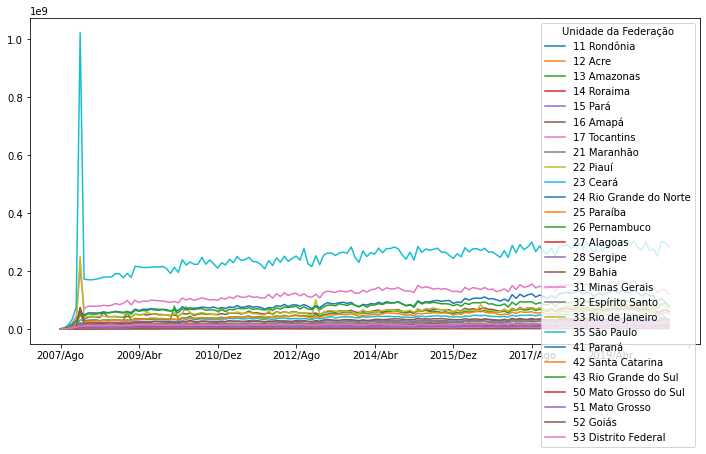

In [ ]:
# retirando a coluna 'Total' para visualizar melhor o gráfico:
usaveis = usaveis.drop('Total', axis=1)

usaveis.T.plot(figsize=(12,6))

# Aula 3

fazendo um plot com slice dos cinco primeiros estados:

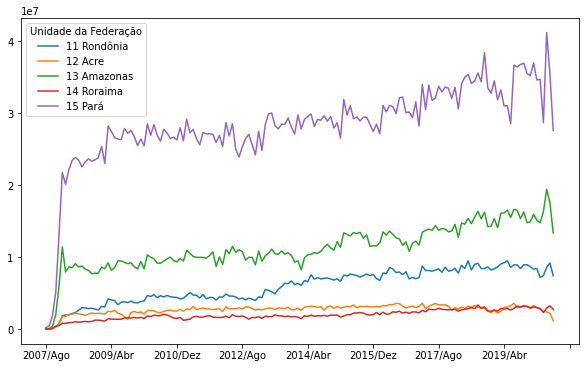

In [ ]:
usaveis[:5].T.plot(figsize=(10,6))

percebemos que parece haver uma lógica por trás da numeração dos estados. Eles parecem ser enumerados por região. Vamos verificar novamente o dataframe:

In [ ]:
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1.829560e+06,1.940793e+06,1.955722e+06,2.143354e+06,2.280383e+06,2.624543e+06,2.973421e+06,2.938286e+06,2.843931e+06,2.878153e+06,2.780023e+06,2.651805e+06,3.147566e+06,3.082108e+06,4.190355e+06,4.040252e+06,3.946424e+06,3.372378e+06,3.720609e+06,3.787323e+06,3.679370e+06,3.866147e+06,3.667809e+06,3.633472e+06,3.812316e+06,3.911776e+06,4.663061e+06,4.524545e+06,4.778755e+06,4.369733e+06,4.632439e+06,4.464307e+06,4.668642e+06,4.490368e+06,4.423840e+06,...,8.133489e+06,8.140639e+06,8.041249e+06,8.199033e+06,8.363386e+06,7.889820e+06,8.603944e+06,8.048398e+06,8.159737e+06,8.457456e+06,7.766983e+06,8.858846e+06,8.407076e+06,9.492939e+06,8.206196e+06,9.011613e+06,9.124968e+06,8.406733e+06,8.411360e+06,8.651082e+06,8.193426e+06,8.388269e+06,8.645316e+06,9.050329e+06,9.211263e+06,9.490545e+06,8.600886e+06,8.919191e+06,8.909112e+06,8.409386e+06,8.924348e+06,8.948606e+06,8.660753e+06,8.326416e+06,8.413784e+06,7.174312e+06,7.423679e+06,8.581195e+06,9.193594e+06,7.407388e+06
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1.731745e+06,1.743979e+06,2.057439e+06,2.057830e+06,2.226578e+06,2.112577e+06,2.029128e+06,1.886872e+06,2.084885e+06,2.230838e+06,2.122013e+06,2.196652e+06,2.152239e+06,2.086776e+06,2.476364e+06,2.396888e+06,2.610262e+06,2.174098e+06,2.051885e+06,1.714708e+06,1.341532e+06,2.288459e+06,2.462713e+06,2.254900e+06,2.381536e+06,2.079981e+06,2.564838e+06,2.588318e+06,2.538526e+06,2.319786e+06,2.279157e+06,2.454599e+06,2.578924e+06,2.625443e+06,2.512995e+06,...,2.811365e+06,3.161447e+06,3.355223e+06,3.562692e+06,3.375297e+06,3.341498e+06,3.358378e+06,3.145385e+06,2.638774e+06,2.968169e+06,2.769797e+06,3.057632e+06,2.874965e+06,3.175575e+06,3.060903e+06,3.253012e+06,3.040645e+06,2.926179e+06,3.126121e+06,2.473455e+06,2.277493e+06,2.594347e+06,2.234388e+06,2.473008e+06,2.979765e+06,3.070534e+06,3.249053e+06,3.567539e+06,2.981073e+06,2.998860e+06,3.293379e+06,3.174249e+06,2.959569e+06,3.261124e+06,2.981264e+06,2.859102e+06,2.472063e+06,2.383895e+06,2.199921e+06,1.163813e+06
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,1.141921e+07,7.934652e+06,8.641517e+06,8.531576e+06,9.079902e+06,8.646296e+06,8.755806e+06,8.331764e+06,8.148090e+06,7.681661e+06,7.761445e+06,7.764783e+06,8.607223e+06,8.385963e+06,9.207129e+06,8.160517e+06,8.562322e+06,9.484999e+06,9.465069e+06,9.267007e+06,9.092824e+06,9.218407e+06,8.674068e+06,8.365788e+06,9.386945e+06,8.373049e+06,1.032115e+07,9.990164e+06,9.767161e+06,9.151838e+06,9.140197e+06,9.437224e+06,9.742680e+06,9.996686e+06,9.532878e+06,...,1.371783e+07,1.390957e+07,1.371883e+07,1.439621e+07,1.374530e+07,1.397979e+07,1.389552e+07,1.351812e+07,1.363519e+07,1.454945e+07,1.275356e+07,1.474941e+07,1.457793e+07,1.538106e+07,1.465365e+07,1.554460e+07,1.637496e+07,1.534334e+07,1.624996e+07,1.425541e+07,1.427405e+07,1.535891e+07,1.410007e+07,1.610397e+07,1.615449e+07,1.652998e+07,1.550998e+07,1.664222e+07,1.649372e+07,1.534632e+07,1.628244e+07,1.478133e+07,1.492338e+07,1.593956e+07,1.513811e+07,1.477374e+07,1.633091e+07,1.944115e+07,1.750933e+07,1.335851e+07
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,8.0

Se olharmos atentamente perceberemos que:

+ os números que começam com **1** respresentam a região **Norte**
+ os que começam com **2** reapresentam a região **Nordeste**
+ já o **3** respresenta **Sudeste**
+ **4** é a região **Sul**
+ **5** é a região **Centro-Oeste**

Se quisermos, por exemplo, fazer um gráfico só com a região Norte:

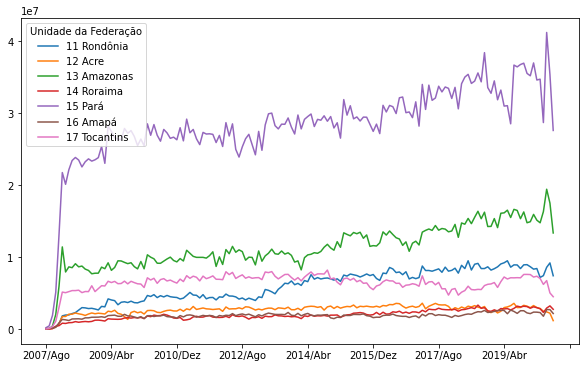

In [ ]:
usaveis[:7].T.plot(figsize=(10,6))

## Amostras aleatórias

É muito comum em uma pesquisa selecionar amostras aleatórias. O pandas nos fornece essa possibilidade através da função .sample(). Podemos, por exemplo, selecionar 5 estados aleatórios para o gráfico:

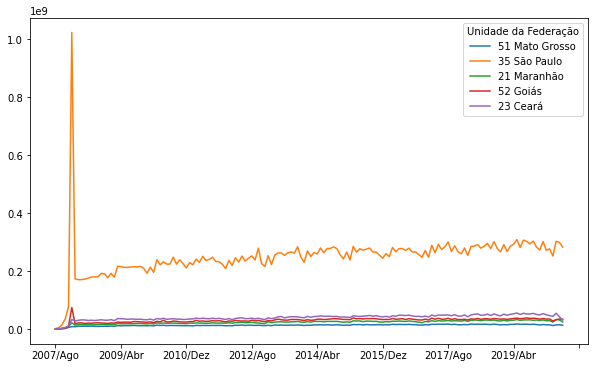

In [ ]:
usaveis.sample(n=5).T.plot(figsize=(10,6))

Para tornar o estudo reproduzível, podemos selecionar uma semente específica. Essa semente tem o papel de ser o número que inicializa os cálculos por baixo dos panos das funções de aleatoriedade. Se selecionamos um número específico para ser a semente, essa semente retornará um grupo específico aleatório. Ao chamar novamente uma função aleatória, novos grupos surgirão, mas essa sequência de grupos será sempre a mesma.

Para gerarmos uma semente, chamamos uma função da biblioteca numpy. Agora, não importa quantas vezes formos executar, ou quem for executar o código, teremos sempre a mesma amostra como retorno.

In [ ]:
import numpy as np
np.random.seed(687942)

usaveis.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,1.621211e+07,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,1.449030e+07,14203837.61,15160988.21,14348102.03,1.519860e+07,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,1.687568e+07,1.518414e+07,1.591326e+07,15189197.44,1.592950e+07,1.700099e+07,1.605530e+07,1.676368e+07,1.648738e+07,...,2.490082e+07,2.670799e+07,2.531364e+07,2.602193e+07,2.679787e+07,2.533631e+07,2.687584e+07,2.525766e+07,2.427612e+07,2.548025e+07,2.268667e+07,2.526673e+07,2.597511e+07,2.744456e+07,2.444462e+07,2.571680e+07,2.549852e+07,2.433823e+07,2.615885e+07,2.467166e+07,2.468369e+07,2.520104e+07,2.471017e+07,2.674073e+07,2.598106e+07,2.869092e+07,2.593689e+07,2.855051e+07,2.929872e+07,2.742927e+07,2.970956e+07,2.623664e+07,2.516304e+07,2.753355e+07,2.654280e+07,2.655569e+07,2.373572e+07,2.861468e+07,2.745087e+07,2.746048e+07
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,1.002407e+08,91831325.37,97289703.07,95723396.53,1.000500e+08,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,1.073899e+08,1.008298e+08,1.054856e+08,99666115.96,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,1.176390e+07,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,1.229823e+07,11640067.28,12397524.20,12629319.37,1.317428e+07,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,1.516214e+07,1.364932e+07,1.424202e+07,12551831.85,1.347031e+07,1.415698e+07,1.394087e+07,1.327206e+07,1.347311e+07,...,1.822530e+07,2.022743e+07,1.886145e+07,1.876651e+07,2.002898e+07,1.853126e+07,1.812258e+07,1.816946e+07,1.811826e+07,1.904547e+07,1.825403e+07,2.097219e+07,2.071743e+07,2.199186e+07,2.090981e+07,2.154486e+07,2.261686e+07,1.992634e+07,2.229082e+07,2.044527e+07,1.938038e+07,2.114738e+07,2.077093e+07,2.177521e+07,2.220658e+07,2.381943e+07,2.161357e+07,2.213709e+07,2.307331e+07,2.343727e+07,2.308577e+07,2.035017e+07,2.013590e+07,2.220112e+07,2.051298e+07,2.093669e+07,1.731995e+07,1.991657e+07,2.021996e+07,1.959306e+07
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5.136475e+06,5051932.07,52001

## Adicionando uma coluna ao dataframe

Para adicionar uma coluna no pandas é muito fácil: basta atribuir valores a uma coluna que não existe. A nova coluna será automaticamente adicionada ao final do dataframe. O nome do índice que dermos será o nome para a nova coluna. Só há uma restrição: a coluna precisa ser totalmente preenchida. Por exemplo, se um data frame possui 27 linhas, então precisamos adicionar uma coluna com 27 dados.

No caso, vamos adicionar uma coluna que contém a informação do valor total gasto por Unidade da Federação.

In [ ]:
usaveis["Total"] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.255727e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206668e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.766926e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268

## Ordenar os estados pelos maiores gastos

Agora a coluna 'Total' será muito útil. Vamos ordenar o dataframe pelos maiores gastos entre os estados. Para isso podemos utilizar os dados da coluna 'Total', do maior valor para o menor.

In [ ]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False) 
ordenado_por_total = ordenado_por_total.drop(["Total"], axis=1)
ordenado_por_total.head(2)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.023565e+09,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.059127e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08


Agora podemos fazer um gráfico com os 5 maiores gastos entre os estados:

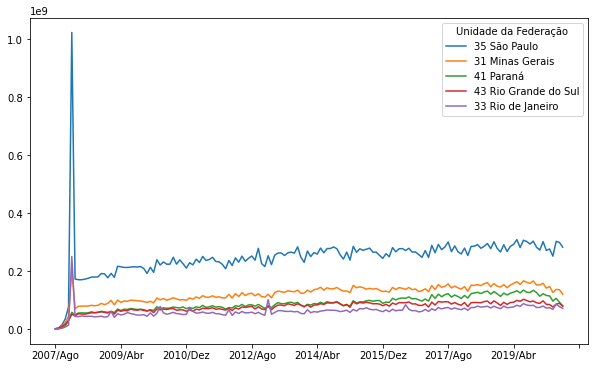

In [ ]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))

## Tratando os picos muito grandes

No notebook da aula passada, verificamos os picos grandes, aonde eles se localizavam e como afetavam os gráficos. Na aula 3 foi discutido que esses picos podem estar relacionados com o começo do registro de gastos. Como o início dos registros se teve em Janeiro de 2008, várias datas de gastos do SUS podem ter sido perdidas. O que pode ter acontecido é o SUS ter optado por registrar esses gastos com a data em que começou o registro, ou seja, Janeiro de 2008.

Para evitar más interpretações, será retirado dos gráficos os dados dos meses até Janeiro de 2008. Assim, começaremos o plot com o mês de Fevereiro.

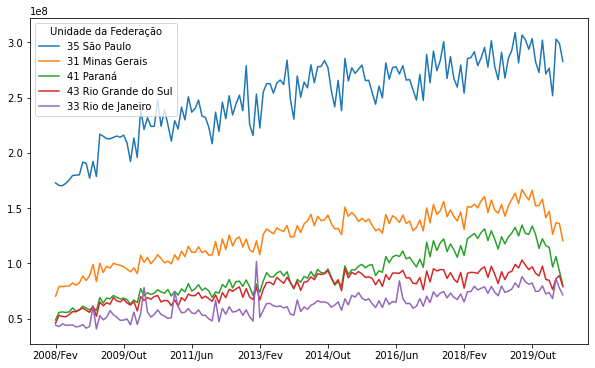

In [ ]:
ordenado_por_total = ordenado_por_total[ordenado_por_total.columns[6:]]
ordenado_por_total.head(5).T.plot(figsize=(10,6))

## Desafios:

### Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

### Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

### Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

### Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

### Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

### Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

### Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

### Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

As cores possuem um papel fundamental na visualização dos gráficos. Se elas não estiverem bem vivíveis e representarem bem as categorizações que queremos trabalhar, nossos gráficos estarão ruins. [Neste site do matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html) encontramos diversas paletes de cores para podermos usar nos gráficos. Não existe a melhor palete do mundo, mas sim a que melhor se adequa ao que queremos representar.

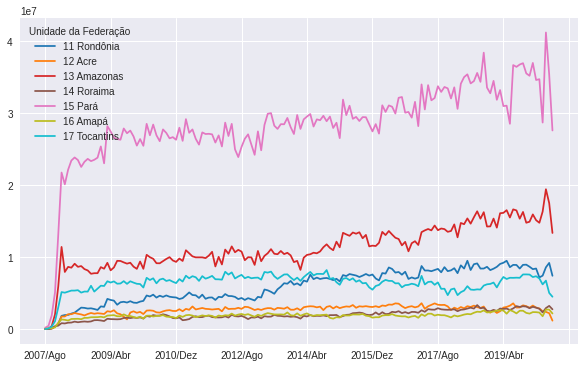

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

usaveis[:7].T.drop('Total').plot(figsize=(10,6), colormap='tab10')

Neste caso acima a palette utilizada foi do tipo de categorização. É o tipo mais indicado para o que estamos querendo representar, já que cada cor está representando um estado referente, devem ser cores bem fáceis de se localizar.

### Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

Como dissemos, a numeração nos estados obedece as regiões às quais eles pertecem. Podemos usar isso a nosso favor.

In [ ]:
codigo_regiao = {1:'Norte', 2:'Nordeste', 3:'Sudeste', 4:'Sul', 5:'Centro-Oeste'}
regioes = []
for estado in usaveis.index:
  regioes.append(codigo_regiao[int(estado[0])])

usaveis['Região'] = regioes
usaveis['Região']

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

### Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

Para melhorar a visualização do gráfico, também foi sugerido retirar as informações que deixam aqueles picos muito altos. No desenvolvimento da aula passada, vimos que esses valores altos correspodem ao mês de Janeiro de 2009. Vamos fazer um slice do dataframe usaveis, pegando os meses de Feveiro de 2009 a Junho de 2020. O mês de Julho de 2020 não foi selecionado pois, na época em que o arquivo foi baixado, os dados para esse mês podiam não estar completos.

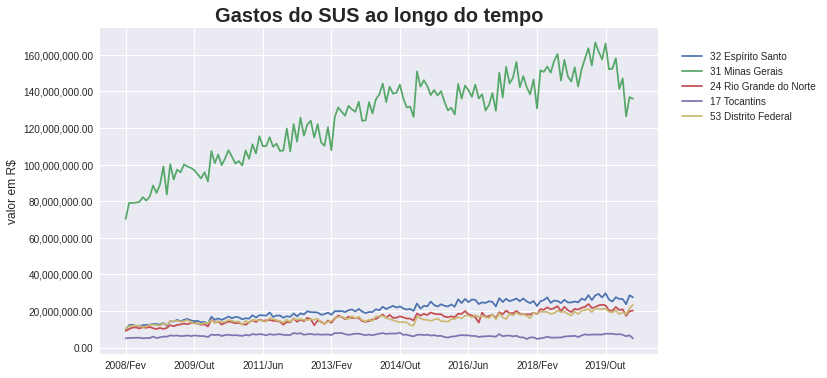

In [ ]:
import matplotlib.ticker as ticker

np.random.seed(687942)
ax = usaveis.sample(n=5).T['2008/Fev':'2020/Jun'].plot(figsize=(10,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS ao longo do tempo', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2)
plt.show()

### Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

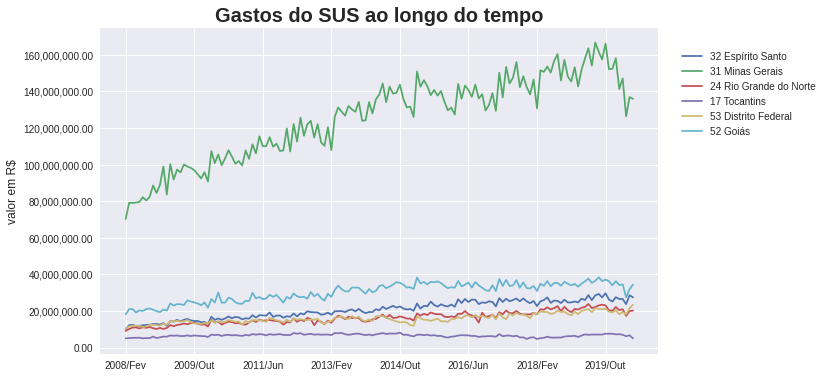

In [ ]:
np.random.seed(687942)

selecionados = usaveis.sample(n=5)
selecionados.loc['52 Goiás'] = usaveis.loc['52 Goiás']
ax = selecionados.T['2008/Fev':'2020/Jun'].plot(figsize=(10,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS ao longo do tempo', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2)
plt.show()

### Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

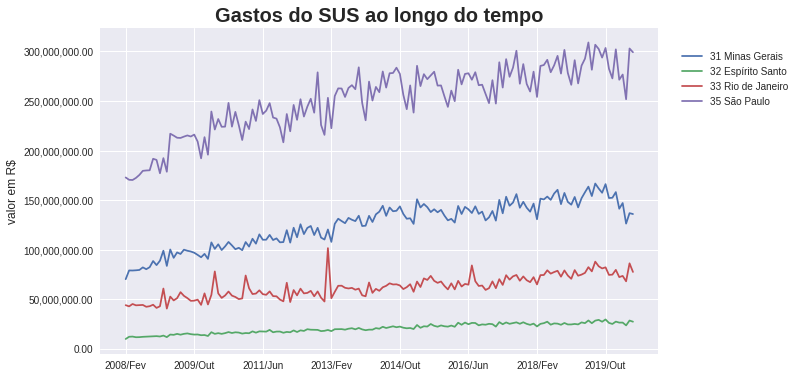

In [ ]:
ax = usaveis.query('Região == "Sudeste"').T['2008/Fev':'2020/Jun'].plot(figsize=(10,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS ao longo do tempo', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2)
plt.show()

Podemos ver que os picos ficaram evidentes nas regiões do Rio de Janeiro e São Paulo. Minas Gerais apresentou um pico, mas muito menor. Por sua vez o Espírito Santo não apresentou um aumento significativio.

### Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

Vamos agora plotar o gráfico para a região do Centro-Oeste:

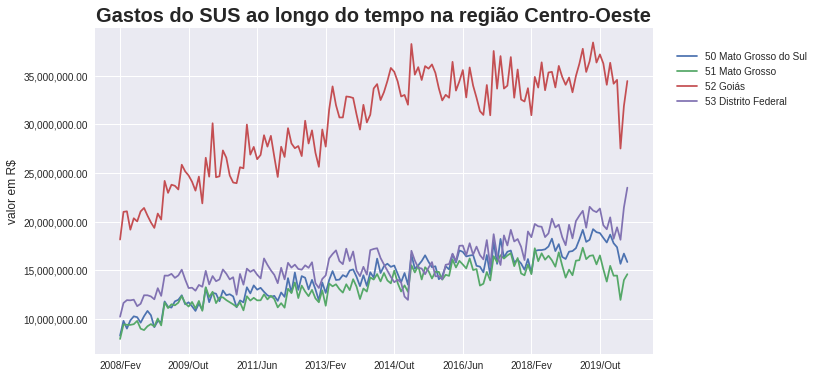

In [ ]:
ax = usaveis.query('Região == "Centro-Oeste"').T['2008/Fev':'2020/Jun'].plot(figsize=(10,6))

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS ao longo do tempo na região Centro-Oeste', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2)
plt.show()

De cara, percebemos um maior gasto em Goiás, que é o estado onde nasci e moro. Em comparação com Mato Grosso, por exemplo, os gastos em alguns meses de Goiás passam do dobro.

Olhando para o gráfico, também parece haver uma periodicidade. Se olharmos para o Estado de Goiás por exemplo, há sempre um declínio que parece maior que o normal, seguido de vários picos, até vir um declínio novamente. Vamos dividir o gráfico agora em setores. A cada ano vamos colocar uma cor diferente no gráfico, para tentar identificar essa periodicidade. Façamos somente para o estado de Goiás, começando em Janeiro de 2009 para iniciarmos o gráfico no primeiro mês de algum ano:

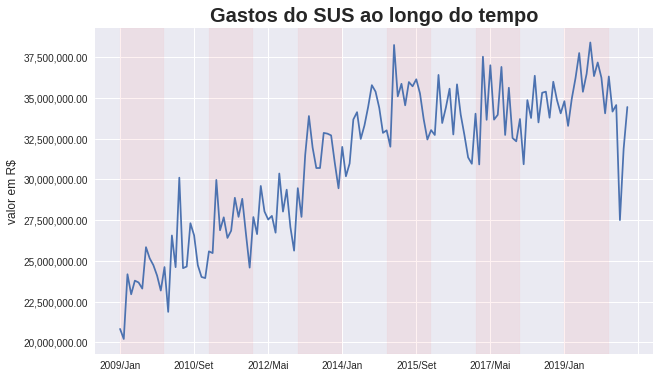

In [ ]:
ax = usaveis.loc['52 Goiás'].T['2009/Jan':'2020/Jun'].plot(figsize=(10,6), legend=None)

# mudando a formatação do eixo y:
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title('Gastos do SUS ao longo do tempo em Goiás', size=20, weight='bold')
plt.ylabel('valor em R$', size=12)
plt.xlabel('')

# alterando a posição da legenda:
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=2)
for month in range(0,144,24):
  plt.axvspan(month, month+12, color='red', alpha=0.05)
plt.show()

E realmente podemos verificar isso: durante o período de um ano completo, os valores oscilam bastante, mas ao final do ano, sempre percebemos uma diminuição dos gastos. Depois do início de um novo ano, os valores crescem novamente e em sua maioria crescem abruptamente, provavelmente uma consequência do período de verão e os casos de dengue.

Entretanto percebemos algo curioso: no início do ano de 2020, percebemos um declínio ao invés de crescimento nos gastos, o que é contrário ao padrão observado nos anos anteriores. É algo interessante para se investigar em trabalhos posteriores, principalmente pelo início de 2020 estar relacionado ao início da quarentena consequência da pandemia do Covid-19.